# Linear Regression as Maximum Likelihood

In [ ]:
%pip install numpy pandas scikit-learn
%pip install matplotlib
%pip install scipy
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [64]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

def random_data(beta, n, std_dev, maxval=100):

    # Generate x as an array of `n` samples which can take a value between 0 and 100
    x = np.random.rand(n) * maxval
    
    # Generate the random error of n samples, with a random value from a normal distribution, with a standard
    # deviation provided in the function argument
    e = np.random.randn(n) * std_dev
    
    # Calculate `y` according to the equation discussed
    y = x * beta + e
    return x, y 

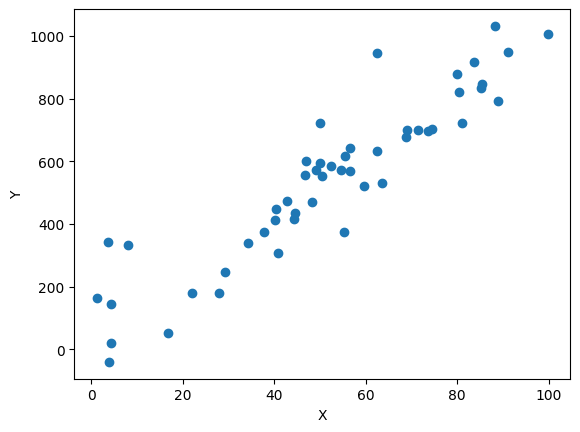

In [30]:
x,y = random_data(10, 50, 100)
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x,y)
plt.show()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=42)

print("Size of train sample: ", len(X_train))
print("Size of test sample: ", len(X_test))

Size of train sample:  33
Size of test sample:  17


Given the dataset, we now maximize the log likelihood for observing $x$ and $y$, subject to the parameters $m$ and $b$.  The likelihood function is expressed as:

$$\prod_{i=0}^N \frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{1}{2\sigma^2}(y_i - \theta^T x_i)^2\right)$$

Taking a log on the above yields:

$$- \frac{N}{2}\log(2\sigma^2\pi) - \frac{1}{2\sigma^2} \sum_{i=0}^N  (y_i - \theta^T x_i)^2$$

Removing terms that don't depend on the parameters and reversing signs produces the following simplified term that we aim to minimize with respect to the parameter $\theta$ (in this case $m$ and $b$):

$$\frac{1}{2\sigma^2} \sum_{i=0}^N  (y_i - \theta^T x_i)^2$$

(The minimization algorithm is described [here](https://en.wikipedia.org/wiki/Limited-memory_BFGS), in case you want to read more about it.)

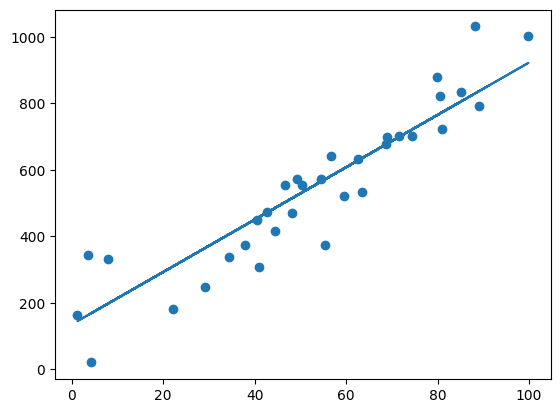

In [32]:
from scipy.optimize import minimize

# A simplified computation of the negative log likelihood, based on the derivation above.

def negative_ll(theta):
    (m, b, sigma) = theta

    y  = m*X_train + b  
    
    # Exponent from log likelihood that we are trying to maximize
    # We negate the term so that we can minimize it.
    L = (1 / (2 * sigma ** 2) * sum((y - y_train) ** 2))
    return L


# minimize 
MLE = minimize(negative_ll, np.array([1,1,1]), method='L-BFGS-B')

(m, b, sigma) = MLE['x']

plt.scatter(X_train,y_train)
plt.plot(x, m*x + b)
plt.show()

# Model Selection and Pipelines

In [33]:
# load libraries
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
wdf = pd.read_csv("C:/Users/Admin/Desktop/ML_2021/data/chicago-weather.csv")
wdf['DATE'] = pd.to_datetime(wdf['DATE'], format='%Y-%m-%d')

midway_temps = wdf[wdf['STATION']=='USC00111577'].loc[:,['DATE','TMIN','TMAX']]
midway_temps_2018 = midway_temps[midway_temps['DATE'] < '2019-01-01']

In [34]:
ddf = pd.read_csv("C:/Users/Admin/Desktop/ML_2021/data/rides_temps.csv")
ddf['START TIME'] = pd.to_datetime(ddf['START TIME'], format='%m/%d/%Y %H:%M:%S %p')

divvy_2018 = ddf[ddf['START TIME'] >= '2018-01-01']
dates = pd.Series(divvy_2018['START TIME'].apply(lambda x: x.date()), index=divvy_2018.index)
divvy_2018.loc[:,'DATE'] = dates

divvy_2018_rides_by_date = pd.DataFrame(divvy_2018.groupby(['DATE'])['DATE'] \
                                  .count() \
                                  .reset_index(name='count') \
                                  .sort_values(['DATE'], ascending=True))

divvy_2018_duration_by_date = pd.DataFrame(divvy_2018.groupby(['DATE'])['TRIP DURATION'] \
                                  .sum() \
                                  .reset_index(name='duration') \
                                  .sort_values(['DATE'], ascending=True))

divvy_2018_by_date = divvy_2018_duration_by_date.merge(divvy_2018_rides_by_date, 
                                                       on='DATE',
                                                       how='left')
divvy_2018_by_date['DATE'] = pd.to_datetime(divvy_2018_by_date['DATE'])

KeyError: 'START TIME'

In [17]:
rides_temps = midway_temps_2018.merge(divvy_2018_by_date, on='DATE')
rides_temps.to_csv('C:/Users/Admin/Desktop/ML_2021/data/rides_temps.csv')

NameError: name 'divvy_2018_by_date' is not defined

In [ ]:
rides_temps = pd.read_csv('C:/Users/Admin/Desktop/ML_2021/data/rides_temps.csv')

# Plot the original set of points
plt.plot(rides_temps['TMIN'].values, rides_temps['count'].values, '.', color='blue', markersize=12)

# Aesthetics
plt.grid(linestyle='--', alpha=0.6)
plt.xlabel('Minimum Temperature')
plt.ylabel('Number of Rides')
plt.xlim((-15,100))
plt.show()

In [ ]:
# Split the Train and Test Sets
rt_train, rt_test = train_test_split(rides_temps, test_size=0.2, random_state=1)

In [ ]:
# FEATURES
tmin = rt_train['TMIN'].values.reshape(-1,1)

# NORMALIZE
scaler = StandardScaler()
tmin_norm = scaler.fit_transform(tmin)

# TARGET
rides = rt_train['count'].values

# Fit the linear regression
regr = linear_model.LinearRegression()
regr.fit(tmin_norm, rides)

# Best Line Prediction Based on Training Data
array = np.array([-30.,100.])
y_hat = regr.predict(scaler.transform(array.reshape(-1,1)))

# Plot the original set of training points
plt.plot(tmin, rides, '.', color='blue', markersize=12)

# Plot the test data
plt.plot(rt_test['TMIN'].values, rt_test['count'].values, '*', color='red', markersize=10)

# Predicted line from sklearn is in red
plt.plot([-30, 100], y_hat, color='red', alpha=0.4, linewidth=3)

plt.xlim((-15,100))
plt.xlabel('Minimum Temperature')
plt.ylabel('Number of Rides')
plt.show()

calculate the mean squared error against the test data.

In [ ]:
test_min = rt_test['TMIN'].values.reshape(-1,1)

# Predict on test data.
rides_predicted = regr.predict(scaler.transform(test_min))

# Compare against test targets.
mse_tt = metrics.mean_squared_error(rt_test['count'], rides_predicted)
mse_tt

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline

# Create a Pipeline.
# All steps except the last one must call 'fit_transform'
# The last step must call 'fit'
pipeline = Pipeline([
    ('norm', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1,include_bias=False)),
    ('ridge', Ridge(alpha=0.1)),
])

### Perform K-Fold Cross Validation

In [36]:
# K-Fold Cross Validation
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=23)

# Note: We're only operating on the (smaller) test data here.
# This is what we want to do when tuning hyper-parameters.
# It may also give us reasonable error across our dataset.

cv_results = cross_val_score(pipeline,
                             tmin,
                             rides,
                             cv=kf,
                             scoring='neg_mean_squared_error'
                            )

mse_cv = -cv_results.mean()

plt.plot(-cv_results, '*')
plt.plot(([0,k]), ([mse_cv, mse_cv]))
plt.show()
mse_cv

NameError: name 'tmin' is not defined

### Hyper-Parameter Tuning: Grid Search

In [37]:
from sklearn.model_selection import GridSearchCV

alpha_range = np.arange(0,1,0.1)
params = {
          'ridge__alpha': alpha_range,
          'poly__degree': (1,2,3)
         }

grid_model = GridSearchCV(estimator=pipeline, 
                          param_grid=params, 
                          cv=k,
                          return_train_score=True,
                          scoring='neg_mean_squared_error')

# Use the model that Grid Search determined was the best.
grid_model_result = grid_model.fit(tmin,rides)

NameError: name 'tmin' is not defined

In [ ]:
# Plot the original set of points
plt.plot(tmin, rides, '.', color='blue', markersize=12)

# Test data is in red
plt.plot(test_min, rt_test['count'].values, '*', color='red', markersize=10 )

# Predicted model in green
y_hat2 = grid_model.predict(tmin)
plt.plot(tmin, y_hat2,'o', color='green', alpha=0.4, markersize=5)

plt.xlim((-15,100))
plt.xlabel('Minimum Temperature')
plt.ylabel('Number of Rides')
plt.show()

Evaluation

In [ ]:
rides_predicted2 = grid_model.predict(test_min)
mse_grid = metrics.mean_squared_error(rt_test['count'], rides_predicted2)
mse_grid

In [ ]:
print("""
MSE (Train-Test Split):\t{}
MSE (Cross Validation):\t{}
MSE (Grid Search):\t{}
""".format(
        mse_tt,mse_cv,mse_grid))

In [ ]:
cv_results = pd.DataFrame(grid_model.cv_results_)
cv_results.columns
ranked_cv=cv_results.sort_values(by=['rank_test_score'])
ranked_cv[['param_ridge__alpha','param_poly__degree','rank_test_score', 'mean_train_score', 'mean_test_score']]

Features and functions

In [40]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [42]:
df = pd.read_csv("C:/Users/Admin/Desktop/ML_2021/data/ucb_salary_2015.csv")
df['gross'] = df['gross'].str.replace(',', '')
df['gross'] = df['gross'].astype(int)
df.head(5)

,year,location,first,last,title,gross,regular,overtime,other
0,2015,Berkeley,ANNE,AABOE,BUS SYS ANL 4,124454,"124,454",0,0
1,2015,Berkeley,DAVID,AAKER,RECALL FACULTY,2500,0,0,"2,500"
2,2015,Berkeley,ELIZABETH,ABEL,PROF-AY,138775,"138,775",0,0
3,2015,Berkeley,NORMAN,ABRAHAMSON,ADJ PROF-AY-1/9-B/E/E,19668,"19,668",0,0
4,2015,Berkeley,BARBARA,ABRAMS,PROF-AY,191162,"169,862",0,"21,300"


In [43]:
mean_salaries = pd.DataFrame(df.groupby(['title'])['gross'] \
                                              .mean() \
                                              .reset_index(name='mean') \
                                              .sort_values(['mean'], ascending=False))
mean_salaries[:10]

,title,mean
594,CHF INV OFCR,1106688.0
2624,SR MGN DIR FIXED INCOME ASSETS,1016853.0
583,CEO MED CTR,910590.0
1185,EXEC VP UC HEALTH,786745.0
2958,VC AND DEAN SOM,634752.0
827,COO MED CTR,609592.2
2193,PRESIDENT OF THE UNIV,584503.0
584,CFO HEALTH SYS AND CAMPUS,551574.0
711,CMO MED CTR,542879.0
2579,SENATE EMERITUS (WOS),538834.0


In [44]:
df['title'] = df['title'].str.replace(r'.*C[EFM]O.*', 'C-SUITE')

msdf = pd.DataFrame(df.groupby(['title'])['gross'] \
                                              .count() \
                                              .reset_index(name='count') \
                                              .sort_values(['count'], ascending=False))

ms_prof = msdf[(msdf['title'].str.contains('PROF-AY')) |
               (msdf['title'].str.contains('C-SUITE'))
              ]
ms_prof[:50]

,title,count
2245,PROF-AY,3334
317,ASSOC PROF-AY,1387
2248,PROF-AY-B/E/E,1139
365,ASST PROF-AY,980
368,ASST PROF-AY-B/E/E,366
319,ASSOC PROF-AY-B/E/E,313
2250,PROF-AY-LAW,158
340,ASST ADJ PROF-AY,142
90,ADJ PROF-AY,83
286,ASSOC ADJ PROF-AY,49


In [48]:
titles = [
          'C-SUITE',
          'PROF-AY-LAW', 
          'ASST PROF-AY', 'ASSOC PROF-AY', 'PROF-AY',
          'ASST ADJ PROF-AY', 'ASSOC ADJ PROF-AY', 'ADJ PROF-AY',  'ACT ASST PROF-AY', 
          'PROF-AY-B/E/E', 'ASSOC PROF-AY-B/E/E', 'ASST PROF-AY-B/E/E'
         ]

df_profs = df[df['title'].isin(titles)]
df_median = df_profs.groupby('title')['gross'].median()
df_index = df_median.sort_values().index

C:\Users\Admin\AppData\Local\Temp\ipykernel_29048\3922689471.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


[Text(0, 0, 'ACT ASST PROF-AY'),
 Text(1, 0, 'ASST ADJ PROF-AY'),
 Text(2, 0, 'ASSOC ADJ PROF-AY'),
 Text(3, 0, 'ADJ PROF-AY'),
 Text(4, 0, 'ASST PROF-AY'),
 Text(5, 0, 'ASSOC PROF-AY'),
 Text(6, 0, 'ASST PROF-AY-B/E/E'),
 Text(7, 0, 'ASSOC PROF-AY-B/E/E'),
 Text(8, 0, 'PROF-AY'),
 Text(9, 0, 'PROF-AY-B/E/E'),
 Text(10, 0, 'PROF-AY-LAW')]

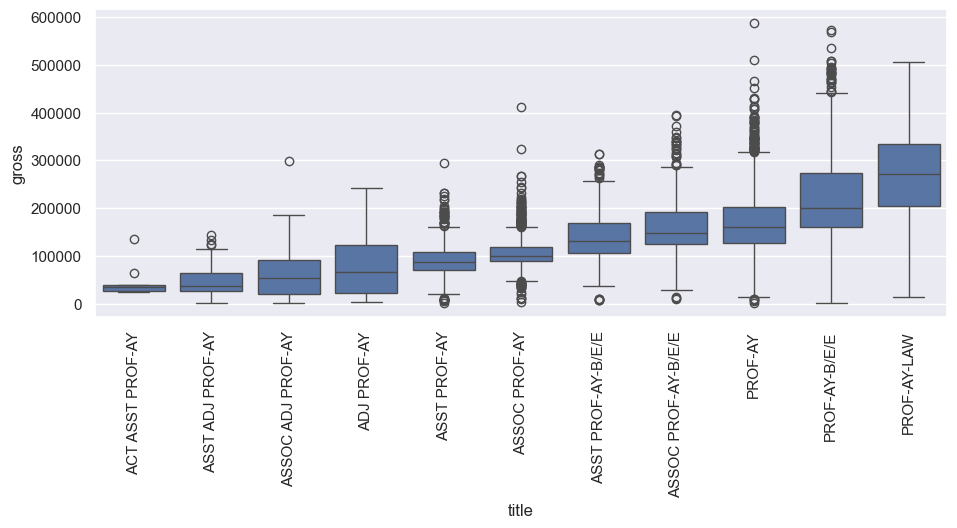

In [49]:
sns.set(rc={'figure.figsize':(11, 4)})
ax = sns.boxplot(x="title", y="gross", data=df_profs, order=df_index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

Linear expression

In [51]:
df_median = df_profs.groupby('title')['gross'].median().sort_values()
df_median = df_median.reset_index()

# Define Features and Target
features = df_median.index.values.reshape(-1,1)
target = df_median.loc[:,'gross']

# Polynomial Features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
pf = poly.fit_transform(features)

pf

array([[   0.,    0.,    0.],
       [   1.,    1.,    1.],
       [   2.,    4.,    8.],
       [   3.,    9.,   27.],
       [   4.,   16.,   64.],
       [   5.,   25.,  125.],
       [   6.,   36.,  216.],
       [   7.,   49.,  343.],
       [   8.,   64.,  512.],
       [   9.,   81.,  729.],
       [  10.,  100., 1000.]])

多项式扩展会让特征数量迅速增加，容易导致过拟合。通常只在特征数量较少时使用，或配合正则化方法。

Linear regression training and testing

In [52]:
# 1. Linear Prediction
regr = LinearRegression()
lm = regr.fit(features,target)
y_hat = regr.predict(features)

# 2. Linear Prediction, Polynomial Feature
pregr = LinearRegression()
pm = pregr.fit(pf,target)
y2_hat = pregr.predict(poly.fit_transform(features))

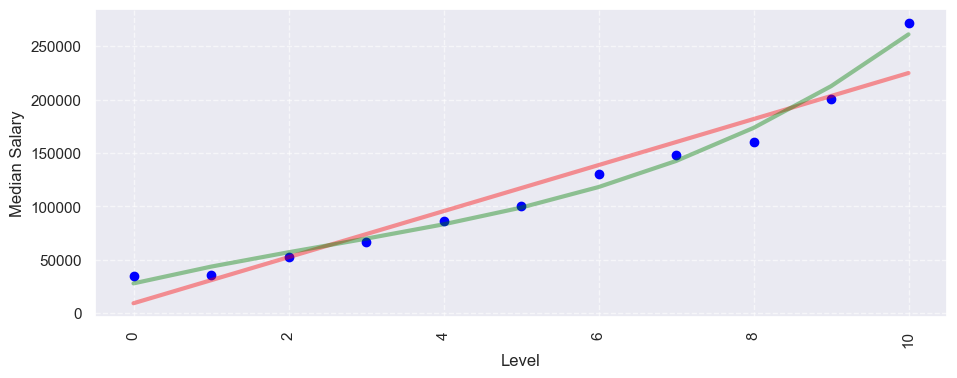

In [53]:
# Points
plt.plot(features, target, '.', color='blue', markersize=12)

# Linear Regression
plt.plot(features, y_hat, color='red', alpha=0.4, linewidth=3)
plt.plot(features, y2_hat, color='green', alpha=0.4, linewidth=3)

plt.grid(linestyle='--', alpha=0.6)
plt.xticks(rotation=90)
plt.xlabel('Level')
plt.ylabel('Median Salary')
plt.show()

2.3 evaluate the model

In [54]:
from sklearn.metrics import mean_squared_error

print("""
RSS Linear Features:\t\t{} 
RSS Polynomial Features:\t{}
""".format(
            np.sqrt(mean_squared_error(target, y_hat)),
            np.sqrt(mean_squared_error(target, y2_hat)
                   )))


RSS Linear Features:		18979.088384623843 
RSS Polynomial Features:	8116.272999297841



Plot in seaborn

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)


<Axes: xlabel='idx', ylabel='gross'>

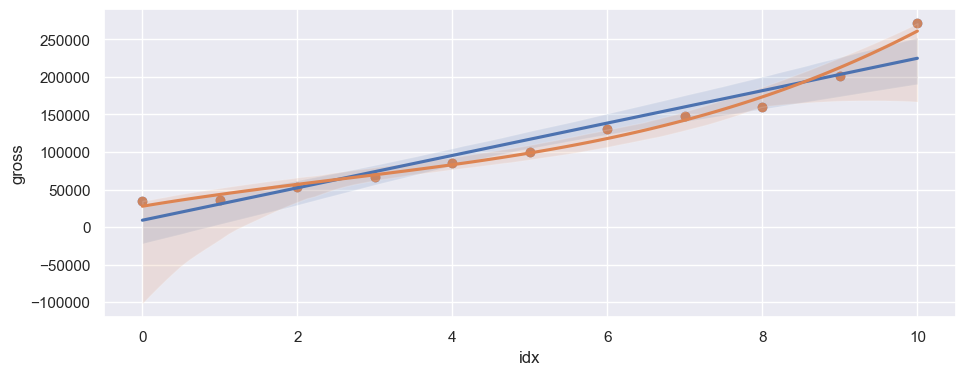

In [56]:
df_median['idx'] = df_median.index.values
sns.regplot(x='idx', y='gross', data=df_median.reset_index())
sns.regplot(x='idx', y='gross', data=df_median.reset_index(), order=3)

Logistic regression

In [57]:
%matplotlib inline

In [58]:
df = pd.read_csv("C:/Users/Admin/Desktop/ML_2021/data/chicago-crimes-2019.csv")
df.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11922110,JC547456,12/15/2019 03:40:00 AM,039XX W NORTH AVE,1020,ARSON,BY FIRE,VEHICLE NON-COMMERCIAL,False,False,...,26.0,23.0,09,1149951.0,1910348.0,2019,04/27/2020 03:48:23 PM,41.909907,-87.724578,"(41.909907002, -87.724577987)"
1,11918688,JC543281,12/11/2019 01:20:00 PM,045XX S WESTERN AVE,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,PARKING LOT / GARAGE (NON RESIDENTIAL),True,False,...,15.0,61.0,26,1161131.0,1874302.0,2019,04/27/2020 03:48:23 PM,41.810768,-87.684508,"(41.810768138, -87.684507864)"
2,11896637,JC516819,11/19/2019 06:36:00 PM,012XX S SPAULDING AVE,031A,ROBBERY,ARMED - HANDGUN,SIDEWALK,False,False,...,24.0,29.0,03,1154560.0,1894222.0,2019,04/27/2020 03:48:23 PM,41.865565,-87.708078,"(41.865564662, -87.708077974)"
3,11845710,JC453753,09/30/2019 04:10:00 AM,048XX W CORTEZ ST,0265,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - OTHER,RESIDENCE,True,True,...,37.0,25.0,02,1143935.0,1906545.0,2019,04/27/2020 03:48:23 PM,41.899586,-87.746774,"(41.89958619, -87.746774067)"
4,11827810,JC432624,09/14/2019 01:25:00 AM,039XX W JACKSON BLVD,041A,BATTERY,AGGRAVATED - HANDGUN,STREET,False,False,...,28.0,26.0,04B,1150182.0,1898397.0,2019,04/27/2020 03:48:23 PM,41.877108,-87.724041,"(41.877107715, -87.724041149)"


## Feature Engineering

In [59]:
df['Arrest'] = df['Arrest'].astype(int)
df['hour'] = pd.to_datetime(df['Date']).dt.hour

In [60]:
# Number of Arrests per hour
arrest_hour = pd.DataFrame(df.groupby(['hour'])['Arrest'] \
                                              .sum() \
                                              .reset_index(name='arrests') \
                                              .sort_values(['hour'], ascending=True))

# Number of Incidents per hour
all_hour = pd.DataFrame(df.groupby(['hour'])['ID'] \
                                              .count() \
                                              .reset_index(name='incidents') \
                                              .sort_values(['hour'], ascending=True))

# New Dataframe
adf = pd.merge(arrest_hour,all_hour,on=['hour'])
adf['prob'] = adf['arrests'] / adf['incidents']
adf

,hour,arrests,incidents,prob
0,0,2264,12467,0.181599
1,1,1769,7942,0.222740
2,2,1340,6922,0.193586
3,3,975,5481,0.177887
4,4,659,4407,0.149535
5,5,477,3827,0.124641
6,6,692,4408,0.156987
7,7,959,6174,0.155329
8,8,1448,8901,0.162678
9,9,1967,11524,0.170687


In [61]:
# This is a derived binary variable that is "toy" for the sake of illustration.
adf['pthresh'] = adf['prob'] > 0.18
adf['hrs'] = (adf['hour'] + 21) % 24
adf

,hour,arrests,incidents,prob,pthresh,hrs
0,0,2264,12467,0.181599,True,21
1,1,1769,7942,0.222740,True,22
2,2,1340,6922,0.193586,True,23
3,3,975,5481,0.177887,False,0
4,4,659,4407,0.149535,False,1
5,5,477,3827,0.124641,False,2
6,6,692,4408,0.156987,False,3
7,7,959,6174,0.155329,False,4
8,8,1448,8901,0.162678,False,5
9,9,1967,11524,0.170687,False,6


Create pipelines

In [62]:
# Features for fitting the model.
x = adf['hrs'].astype('float').values.reshape(-1,1)
y = adf['pthresh']
z = np.arange(0.,24.,1).reshape(-1, 1);

In [ ]:
penalty='l2'
C = 10
solver='lbfgs'

pipeline = Pipeline([  # 普通逻辑回归 标准化
    ('norm', StandardScaler()),
    ('logr', LogisticRegression(penalty=penalty, 
                                C=C,
                                solver=solver))
])

pipelineCV = Pipeline([   # 交叉验证逻辑回归 选最优正则化参数 处理类别不平衡 更容易调参和复用
    ('norm', StandardScaler()),
    ('logr', LogisticRegressionCV(penalty=penalty,
                                  class_weight='balanced',
                                  Cs=C,
                                  cv=3,
                                  random_state=0,
                                  solver=solver)),
])

Prediction

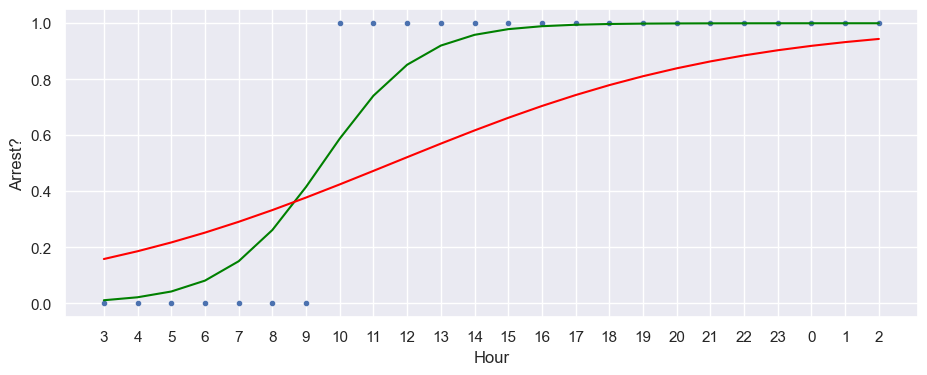

In [67]:
pipeline.fit(x,y)
line = pipeline.predict_proba(z)[:,1]

pipelineCV.fit(x,y)
lineCV = pipelineCV.predict_proba(z)[:,1]

hours = pd.concat([adf['hour'][3:], adf['hour'][0:3]])
plt.xticks(np.arange(24),hours)
plt.xlabel('Hour')
plt.ylabel('Arrest?')
plt.plot(x,y,'.')
plt.plot(z, line, color='green')
plt.plot(z, lineCV, color='red')
plt.show()

## Live Class Data Exploration

In [68]:
df['datetime'] = pd.to_datetime(df['Date'])

In [69]:
df['minute'] = df['datetime'].dt.hour * 60 + df['datetime'].dt.minute
df['second'] = df['minute'] * 60 + df['datetime'].dt.second
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,hour,datetime,minute,second
0,11922110,JC547456,12/15/2019 03:40:00 AM,039XX W NORTH AVE,1020,ARSON,BY FIRE,VEHICLE NON-COMMERCIAL,0,False,...,1910348.0,2019,04/27/2020 03:48:23 PM,41.909907,-87.724578,"(41.909907002, -87.724577987)",3,2019-12-15 03:40:00,220,13200
1,11918688,JC543281,12/11/2019 01:20:00 PM,045XX S WESTERN AVE,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,PARKING LOT / GARAGE (NON RESIDENTIAL),1,False,...,1874302.0,2019,04/27/2020 03:48:23 PM,41.810768,-87.684508,"(41.810768138, -87.684507864)",13,2019-12-11 13:20:00,800,48000
2,11896637,JC516819,11/19/2019 06:36:00 PM,012XX S SPAULDING AVE,031A,ROBBERY,ARMED - HANDGUN,SIDEWALK,0,False,...,1894222.0,2019,04/27/2020 03:48:23 PM,41.865565,-87.708078,"(41.865564662, -87.708077974)",18,2019-11-19 18:36:00,1116,66960
3,11845710,JC453753,09/30/2019 04:10:00 AM,048XX W CORTEZ ST,0265,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - OTHER,RESIDENCE,1,True,...,1906545.0,2019,04/27/2020 03:48:23 PM,41.899586,-87.746774,"(41.89958619, -87.746774067)",4,2019-09-30 04:10:00,250,15000
4,11827810,JC432624,09/14/2019 01:25:00 AM,039XX W JACKSON BLVD,041A,BATTERY,AGGRAVATED - HANDGUN,STREET,0,False,...,1898397.0,2019,04/27/2020 03:48:23 PM,41.877108,-87.724041,"(41.877107715, -87.724041149)",1,2019-09-14 01:25:00,85,5100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258995,24550,JC270190,05/20/2019 01:13:00 AM,001XX N HERMITAGE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,0,False,...,1901279.0,2019,05/27/2019 04:12:56 PM,41.884721,-87.670624,"(41.884720804, -87.670624155)",1,2019-05-20 01:13:00,73,4380
258996,24551,JC271105,05/20/2019 06:07:00 PM,078XX S STATE ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,0,False,...,1852817.0,2019,05/27/2019 04:12:56 PM,41.751453,-87.624568,"(41.751452878, -87.624567581)",18,2019-05-20 18:07:00,1087,65220
258997,24554,JC274572,05/23/2019 01:00:00 AM,069XX S MAPLEWOOD AVE,0110,HOMICIDE,FIRST DEGREE MURDER,PORCH,0,False,...,1858532.0,2019,05/30/2019 04:12:42 PM,41.767505,-87.686989,"(41.767504682, -87.686989416)",1,2019-05-23 01:00:00,60,3600
258998,24556,JC276141,05/24/2019 02:12:00 AM,013XX W 61ST ST,0110,HOMICIDE,FIRST DEGREE MURDER,GARAGE,0,False,...,1864312.0,2019,05/31/2019 04:09:56 PM,41.783199,-87.657851,"(41.783199083, -87.657851361)",2,2019-05-24 02:12:00,132,7920


In [70]:
# Number of Arrests per hour
arrest_second = pd.DataFrame(df.groupby(['second'])['Arrest'] \
                                              .sum() \
                                              .reset_index(name='arrests') \
                                              .sort_values(['second'], ascending=True))

# Number of Incidents per hour
all_second = pd.DataFrame(df.groupby(['second'])['ID'] \
                                              .count() \
                                              .reset_index(name='incidents') \
                                              .sort_values(['second'], ascending=True))


# New Dataframe
adf2 = pd.merge(arrest_second,all_second,on=['second'])
adf2['prob'] = adf2['arrests'] / adf2['incidents']
adf2

,second,arrests,incidents,prob
0,0,150,3305,0.045386
1,60,102,2482,0.041096
2,120,38,94,0.404255
3,180,28,81,0.345679
4,240,31,65,0.476923
...,...,...,...,...
1609,86100,64,230,0.278261
1610,86160,24,52,0.461538
1611,86220,26,56,0.464286
1612,86280,42,91,0.461538


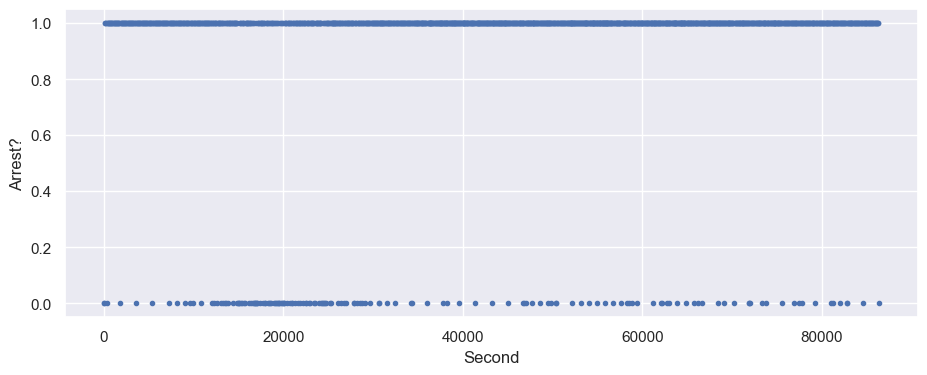

In [71]:
x = adf2['second']
y = adf2['prob'] > 0.18
plt.xlabel('Second')
plt.ylabel('Arrest?')
plt.plot(x,y,'.')
#plt.plot(z, line, color='green')
#plt.plot(z, lineCV, color='red')
plt.show()